In [1]:
from pymol import cmd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def percent_ss(ss_string):
    # H percent, S percent, L percent
    return [ss_string.count('H')/len(ss_string),ss_string.count('S')/len(ss_string),ss_string.count('L')/len(ss_string)]

In [2]:
avaiable_DF = pd.read_csv("available_result.csv")

In [3]:
ss_list_A501 = []
ss_list_3DAC = []

for i in range(avaiable_DF.shape[0]):
    # Extract A501 secondary structure
    cmd.load("A501/A501_summary/%s/relaxed_model_1.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    cmd.dss()
    ss_string = ""
    for a in cmd.get_model(avaiable_DF["A501_sequence_id"][i] +" and n. ca").atom:
        ss_string = ss_string+a.ss 
    ss_list_A501.append(ss_string)
    cmd.reinitialize()

    # Extract 3DAC secondary structure
    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_1.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    cmd.dss()
    ss_string = ""
    for a in cmd.get_model(avaiable_DF["3DAC_sequence_id"][i] +" and n. ca").atom:
        ss_string = ss_string+a.ss 
    ss_list_3DAC.append(ss_string)
    cmd.reinitialize()

avaiable_DF["A501_secondary_structure"] = ss_list_A501
avaiable_DF["3DAC_secondary_structure"] = ss_list_3DAC

 PyMOL not running, entering library mode (experimental)


In [4]:
avaiable_DF.to_csv("available_result.csv",index=False)

In [5]:
percent_ss(ss_string)

[0.2433734939759036, 0.3686746987951807, 0.38795180722891565]

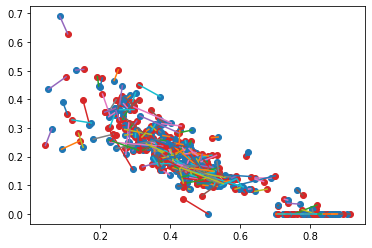

In [6]:
plt.figure()
for i in range(avaiable_DF.shape[0]):
    plt.scatter(percent_ss(avaiable_DF["A501_secondary_structure"][i])[0],percent_ss(avaiable_DF["A501_secondary_structure"][i])[1],label="A501",c="tab:red")
    plt.scatter(percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[0],percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[1],label="3DAC",c="tab:blue")
    plt.plot([percent_ss(avaiable_DF["A501_secondary_structure"][i])[0],percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[0]],[percent_ss(avaiable_DF["A501_secondary_structure"][i])[1],percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[1]])


In [7]:
list_H_A501 = []
list_S_A501 = []
list_L_A501 = []
list_H_3DAC = []
list_S_3DAC = []
list_L_3DAC = []
for i in range(avaiable_DF.shape[0]):
    list_H_A501.append(percent_ss(avaiable_DF["A501_secondary_structure"][i])[0])
    list_S_A501.append(percent_ss(avaiable_DF["A501_secondary_structure"][i])[1])
    list_L_A501.append(percent_ss(avaiable_DF["A501_secondary_structure"][i])[2])
    list_H_3DAC.append(percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[0])
    list_S_3DAC.append(percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[1])
    list_L_3DAC.append(percent_ss(avaiable_DF["3DAC_secondary_structure"][i])[2])

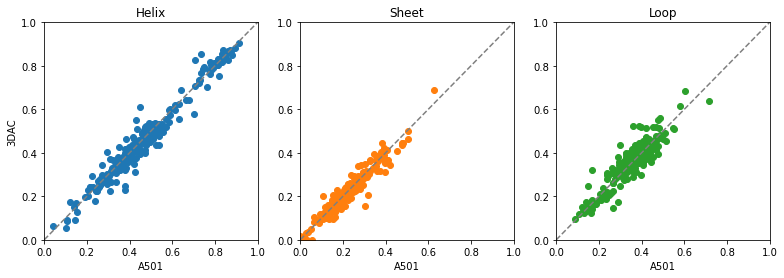

In [8]:
plt.figure(figsize=(13,4))
plt.subplot(131)
plt.scatter(list_H_A501,list_H_3DAC,color="tab:blue")
plt.plot([0,1],[0,1],linestyle="--",color="tab:grey")
plt.title("Helix")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("A501")
plt.ylabel("3DAC")

plt.subplot(132)
plt.scatter(list_S_A501,list_S_3DAC,color="tab:orange")
plt.plot([0,1],[0,1],linestyle="--",color="tab:grey")
plt.title("Sheet")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("A501")

plt.subplot(133)
plt.scatter(list_L_A501,list_L_3DAC,color="tab:green")
plt.plot([0,1],[0,1],linestyle="--",color="tab:grey")
plt.title("Loop")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("A501")
plt.savefig("Figure/secondary_structure.png",dpi=300)


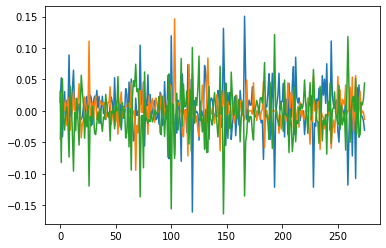

In [9]:
plt.plot([list_H_A501[i]-list_H_3DAC[i] for i in range(len(list_H_3DAC))])
plt.plot([list_S_A501[i]-list_S_3DAC[i] for i in range(len(list_H_3DAC))])
plt.plot([list_L_A501[i]-list_L_3DAC[i] for i in range(len(list_H_3DAC))])


In [10]:
avaiable_DF["A501_secondary_structure_H_Part"] = list_H_A501
avaiable_DF["A501_secondary_structure_S_Part"] = list_S_A501
avaiable_DF["A501_secondary_structure_L_Part"] = list_L_A501
avaiable_DF["3DAC_secondary_structure_H_Part"] = list_H_3DAC
avaiable_DF["3DAC_secondary_structure_S_Part"] = list_S_3DAC
avaiable_DF["3DAC_secondary_structure_L_Part"] = list_L_3DAC

avaiable_DF.to_csv("available_result.csv",index=False)